Importations and Data Loading

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


glass_df = pd.read_csv('glass.csv')

Plotting Data

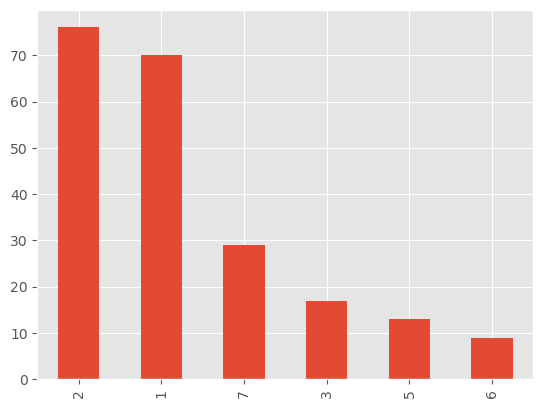

In [34]:
glass_type = glass_df['Type of glass'].value_counts()
plt.style.use('ggplot')
glass_type.plot(kind='bar')
plt.show()

Splitting data into training and Testing data sets

Fitting the classifier into training data and printing accuracy

In [35]:
X = glass_df.drop("Type of glass", axis=1).values
y = glass_df["Type of glass"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Print the accuracy
print(int(knn.score(X_test, y_test)))

1


Over-fitting & Under-fitting

In [36]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
  	# Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
  	# Fit the model
    knn.fit(X_train, y_train)
  
  	# Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9932885906040269, 3: 0.9865771812080537, 4: 0.9798657718120806, 5: 0.9932885906040269, 6: 0.9932885906040269, 7: 0.9865771812080537, 8: 0.9865771812080537, 9: 0.9798657718120806, 10: 0.9932885906040269, 11: 0.9865771812080537, 12: 0.9932885906040269} 
 {1: 1.0, 2: 1.0, 3: 1.0, 4: 0.9846153846153847, 5: 1.0, 6: 0.9846153846153847, 7: 1.0, 8: 1.0, 9: 1.0, 10: 0.9692307692307692, 11: 1.0, 12: 0.9846153846153847}


Visualizing The Complexity of The Model

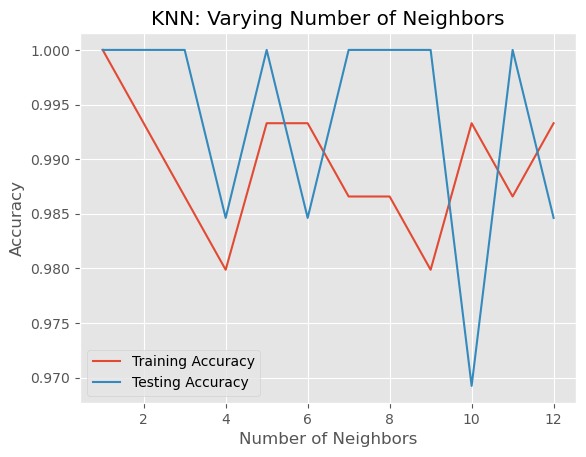

In [37]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

Calculating confusion Matrix & Classification Report

In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  0  0  0  0  0]
 [ 0 23  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         9

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

